In [5]:
pip install textblob wordcloud matplotlib nltk


   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   ------- -------------------------------- 122.9/626.3 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 6.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\campus4D037\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

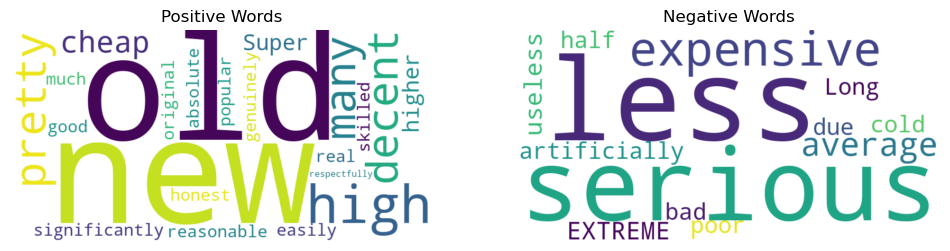

In [11]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from nltk.tokenize import word_tokenize

# 입력 텍스트 (예시로 주어진 긴 텍스트)
text = """
Depends on what you are looking at. Super hit models always claim a higher resale value. Plus given the inflation rate in emerging economies are high, new car price increases significantly year on year and so does the resale band width.

When you bring such topics, you should also quote real time examples. If I look in to our classified section, the newest add as I write is this. A five year old Creta, 1.6Crdi Automatic with 36k on the odo is quoted 10.9L which I think can be easily negotiated to less than 10L. A new car equivalent today costs about 19.5L so the depreciation is ~50% which IMO is pretty decent for a popular model.

Depends on where you're looking. If it's olx, people inflate prices in anticipation of bargaining. Look for used cars on car24. I see decent deals everywhere tbh. I guess it also depends on your State.

It also depends on make and model. I own a VW, I know I'll face EXTREME depreciation if I were to sell it, otoh the depreciation hit on my Maruti was pretty reasonable. A Fortuner/Innova is going to be almost immune to any depreciation, while you can pick up the Yaris at good prices.

The problem that I face is the absolute lack of experience to judge the depreciated value of cars. Portals like obv and India bluebook seem to be off the mark more often than not.

A few questions:
1. How do you judge the value of a car after 5 to 6 years? Most online depreciation tables run till the 6th year.
2. Do I need to consider the inflation adjusted value of the cars original OTR price when calculating depreciation. I guess that makes sense but then these online portals would be so off the mark that they would become useless.

• People who are not serious about selling their car within a time-frame simply post ads to search for the highest bidder. This creates an illusion of high prices that serious sellers mistake as market prices. Thereby artificially jacking up the price.
• Car prices too have infact been going up 6-7% year-on-year. (This increment is apart from auto-makers who launch cars on introductory prices).
• There is a cartel of used-car-dealers leveraging on the inconvenience to sell ones car privately, while exchange/finance incentivises people to sell to dealers.
• IMO There is genuinely a lack of education/maturity with many sellers/buyers and they are refuse to keep their mind open to other peoples rationale. Many are simply cold about it & don't even justify anything. Sometimes understandable, since individual sellers are hounded by dealers (& even individuals) constantly demeaning their car.
Short answer:: demand and supply

Long answer: to be honest, in my opinion, it is not as high it should be. Considering we are a supposed to be a low Labour cost market.

Remember most people in West sell their cars because:
1) it would be expensive to maintain an old Banger than pay EMI of new car.
2) your average new car prices are less than half of annual salary of average Joe.

So IMHO in India used car prices are lower than they should be.

because:
1) labour is cheap but skilled labour is not and dishonesty is rampant so it's not as cheap to maintain a used cars as it should be.
2) due to bad infrastructure and poor maintenance car life is much shorter. In Western markets a 100k mile(160k km) car is old but okyish buy. Whereas, in India few cars survive respectfully beyond that milage (Unless they carry a Toyota badge).

So I disagree with the statement that used cars are expensive in India. If you want I can give you my 6 years old Santa Fe for 33% of buying price
"""

# 텍스트에서 감정 분석
blob = TextBlob(text)

# 감정 점수를 가진 단어 추출
positive_words = [word for sentence in blob.sentences for word in sentence.words if TextBlob(word).sentiment.polarity > 0]
negative_words = [word for sentence in blob.sentences for word in sentence.words if TextBlob(word).sentiment.polarity < 0]

# 긍정적 및 부정적 단어를 문자열로 변환
positive_text = ' '.join(positive_words)
negative_text = ' '.join(negative_words)

# 긍정적 단어와 부정적 단어에 대해 각각 워드클라우드 생성
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# 긍정적 워드클라우드 시각화
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Words')

# 부정적 워드클라우드 시각화
plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Words')

plt.show()


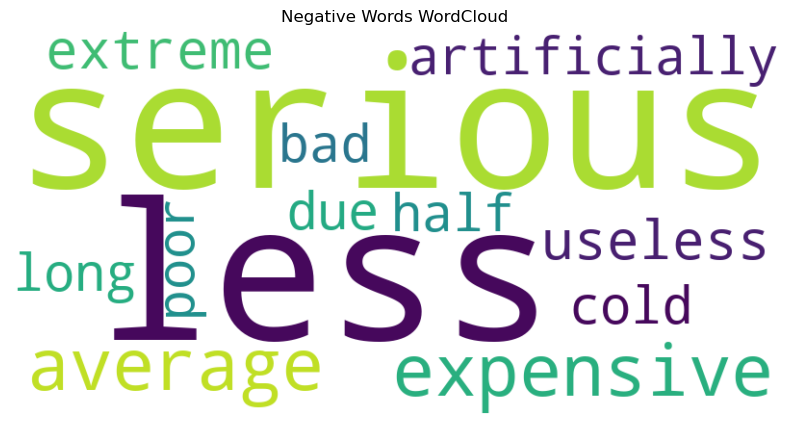

In [13]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# 입력 텍스트 (예시로 주어진 긴 텍스트)
text = """
Depends on what you are looking at. Super hit models always claim a higher resale value. Plus given the inflation rate in emerging economies are high, new car price increases significantly year on year and so does the resale band width.

When you bring such topics, you should also quote real time examples. If I look in to our classified section, the newest add as I write is this. A five year old Creta, 1.6Crdi Automatic with 36k on the odo is quoted 10.9L which I think can be easily negotiated to less than 10L. A new car equivalent today costs about 19.5L so the depreciation is ~50% which IMO is pretty decent for a popular model.

Depends on where you're looking. If it's olx, people inflate prices in anticipation of bargaining. Look for used cars on car24. I see decent deals everywhere tbh. I guess it also depends on your State.

It also depends on make and model. I own a VW, I know I'll face EXTREME depreciation if I were to sell it, otoh the depreciation hit on my Maruti was pretty reasonable. A Fortuner/Innova is going to be almost immune to any depreciation, while you can pick up the Yaris at good prices.

The problem that I face is the absolute lack of experience to judge the depreciated value of cars. Portals like obv and India bluebook seem to be off the mark more often than not.

A few questions:
1. How do you judge the value of a car after 5 to 6 years? Most online depreciation tables run till the 6th year.
2. Do I need to consider the inflation adjusted value of the cars original OTR price when calculating depreciation. I guess that makes sense but then these online portals would be so off the mark that they would become useless.

• People who are not serious about selling their car within a time-frame simply post ads to search for the highest bidder. This creates an illusion of high prices that serious sellers mistake as market prices. Thereby artificially jacking up the price.
• Car prices too have infact been going up 6-7% year-on-year. (This increment is apart from auto-makers who launch cars on introductory prices).
• There is a cartel of used-car-dealers leveraging on the inconvenience to sell ones car privately, while exchange/finance incentivises people to sell to dealers.
• IMO There is genuinely a lack of education/maturity with many sellers/buyers and they are refuse to keep their mind open to other peoples rationale. Many are simply cold about it & don't even justify anything. Sometimes understandable, since individual sellers are hounded by dealers (& even individuals) constantly demeaning their car.
Short answer:: demand and supply

Long answer: to be honest, in my opinion, it is not as high it should be. Considering we are a supposed to be a low Labour cost market.

Remember most people in West sell their cars because:
1) it would be expensive to maintain an old Banger than pay EMI of new car.
2) your average new car prices are less than half of annual salary of average Joe.

So IMHO in India used car prices are lower than they should be.

because:
1) labour is cheap but skilled labour is not and dishonesty is rampant so it's not as cheap to maintain a used cars as it should be.
2) due to bad infrastructure and poor maintenance car life is much shorter. In Western markets a 100k mile(160k km) car is old but okyish buy. Whereas, in India few cars survive respectfully beyond that milage (Unless they carry a Toyota badge).

So I disagree with the statement that used cars are expensive in India. If you want I can give you my 6 years old Santa Fe for 33% of buying price
"""

# 불용어 리스트 가져오기
stop_words = set(stopwords.words('english'))

# 텍스트 정제 및 토큰화
tokens = word_tokenize(text.lower())
filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

# 감정 분석을 통해 부정적인 단어 추출
blob = TextBlob(' '.join(filtered_tokens))
negative_words = [word for word in filtered_tokens if TextBlob(word).sentiment.polarity < 0]

# 추출된 부정적인 단어를 문자열로 변환
negative_text = ' '.join(negative_words)

# 워드클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Words WordCloud')
plt.show()


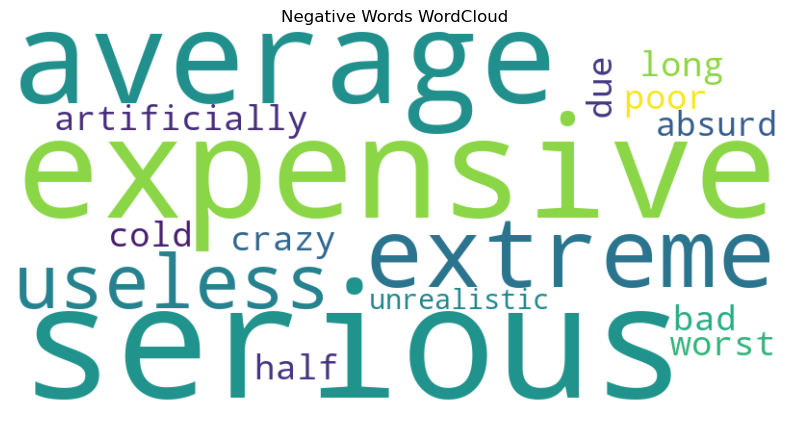

In [19]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# 입력 텍스트 (예시로 주어진 긴 텍스트)
text = """
Depends on what you are looking at. Super hit models always claim a higher resale value. Plus given the inflation rate in emerging economies are high, new car price increases significantly year on year and so does the resale band width.

When you bring such topics, you should also quote real time examples. If I look in to our classified section, the newest add as I write is this. A five year old Creta, 1.6Crdi Automatic with 36k on the odo is quoted 10.9L which I think can be easily negotiated to less than 10L. A new car equivalent today costs about 19.5L so the depreciation is ~50% which IMO is pretty decent for a popular model.

Depends on where you're looking. If it's olx, people inflate prices in anticipation of bargaining. Look for used cars on car24. I see decent deals everywhere tbh. I guess it also depends on your State.

It also depends on make and model. I own a VW, I know I'll face EXTREME depreciation if I were to sell it, otoh the depreciation hit on my Maruti was pretty reasonable. A Fortuner/Innova is going to be almost immune to any depreciation, while you can pick up the Yaris at good prices.

The problem that I face is the absolute lack of experience to judge the depreciated value of cars. Portals like obv and India bluebook seem to be off the mark more often than not.

A few questions:
1. How do you judge the value of a car after 5 to 6 years? Most online depreciation tables run till the 6th year.
2. Do I need to consider the inflation adjusted value of the cars original OTR price when calculating depreciation. I guess that makes sense but then these online portals would be so off the mark that they would become useless.

• People who are not serious about selling their car within a time-frame simply post ads to search for the highest bidder. This creates an illusion of high prices that serious sellers mistake as market prices. Thereby artificially jacking up the price.
• Car prices too have infact been going up 6-7% year-on-year. (This increment is apart from auto-makers who launch cars on introductory prices).
• There is a cartel of used-car-dealers leveraging on the inconvenience to sell ones car privately, while exchange/finance incentivises people to sell to dealers.
• IMO There is genuinely a lack of education/maturity with many sellers/buyers and they are refuse to keep their mind open to other peoples rationale. Many are simply cold about it & don't even justify anything. Sometimes understandable, since individual sellers are hounded by dealers (& even individuals) constantly demeaning their car.
Short answer:: demand and supply

Long answer: to be honest, in my opinion, it is not as high it should be. Considering we are a supposed to be a low Labour cost market.

Remember most people in West sell their cars because:
1) it would be expensive to maintain an old Banger than pay EMI of new car.
2) your average new car prices are less than half of annual salary of average Joe.

So IMHO in India used car prices are lower than they should be.

because:
1) labour is cheap but skilled labour is not and dishonesty is rampant so it's not as cheap to maintain a used cars as it should be.
2) due to bad infrastructure and poor maintenance car life is much shorter. In Western markets a 100k mile(160k km) car is old but okyish buy. Whereas, in India few cars survive respectfully beyond that milage (Unless they carry a Toyota badge).

So I disagree with the statement that used cars are expensive in India. If you want I can give you my 6 years old Santa Fe for 33% of buying price

Yes, used car prices are crazy in India. Some guys ask 95 per cent of O.R. price after 4 years and 50k Kms. What universe do they live in? Heck, I wouldn't consider a penny above 60 per cent to be worth for such cars. Again, assuming they are in pristine condition.

IMO, the worst places to buy used are Bangalore followed by Hyderabad. The best places to buy used are Delhi, Mumbai and Kolkata, in that order. And, one should stay miles away from successful models, such as Innova, Creta etc. The asking prices for such cars sound absurd. Better to buy its less successful but equally reliable rivals.

Asking prices are high but they dont sell at those prices. Cheap buyers tend to quote around 50% of what a seller has listed a product for, even if the listed price is as per market rate. This makes sellers list at high prices so that market price or something close to it can be secured.

I have sold 3 vehicles in last 5 years.
1. An October 2015 Honda CBR 150R (orange colour), done 600Km for 80k or something in July 2016. An individual seller harassed me by calling me as 3 separate customers from 3 different numbers, trying to reduce price to 50-60k (On road price was around 1.3 lacs in October 2015 when I bought it). I eventually sold it to him for 80k. Listed price was 95,000/- for a 10 months old motorcycle. I should have quoted above market price rather than listing an honest price.

2. A Sept 2016 made Bajaj RS200 listed for 75k was eventually sold for 50k in 2019, this one was bought pre-owned in Sept 2017 for 85k in Jodhpur. First Owner still hand loan of around 80k on this vehicle and I offered him 85k from my learning after selling CBR for such price. I kept that motorcycle for sometime and sold it in October 2019 for 50k to a very “sticky and buggy dealer”. Only one individual seller approached me for this bike in the 9-10 months period that I had it for sale. The dealer was able to sell it within 7 days after buying from me so this shows people are willing to pay high amount to dealers rather than dealing with sellers directly.

3. A 2000 Maruti 800 EX sold in 2020 for 29k. It had done 40k Kms and was in excellent mechanical condition. An individual seller bought it on first visit itself. Did not have good experience dealing with Cars24 representative while selling this car.

Selling a possession (car, motorcycle or even an electronic item such as digital camera for that matter) is a heartbreak when you have to deal with super cheap people online who are just passing time quoting unrealistic prices.


I have had a person tell me to sell my RS200 to him for 40-45k as that was his max. paying capacity.

By that logic, I also want to own a Mercedes CLA or a Land Rover Discovery but shall I visit a seller with 5-10 lacs and demand him to sell one to me coz thats my paying capacity?

"""

# 불용어 리스트 가져오기
stop_words = set(stopwords.words('english'))

# 제거할 특정 단어 리스트 (여기서는 'less'를 제외합니다)
exclude_words = {'less'}

# 텍스트 정제 및 토큰화
tokens = word_tokenize(text.lower())
filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words and word not in exclude_words]

# 감정 분석을 통해 부정적인 단어 추출
blob = TextBlob(' '.join(filtered_tokens))
negative_words = [word for word in filtered_tokens if TextBlob(word).sentiment.polarity < 0]

# 추출된 부정적인 단어를 문자열로 변환
negative_text = ' '.join(negative_words)

# 워드클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Words WordCloud')
plt.show()


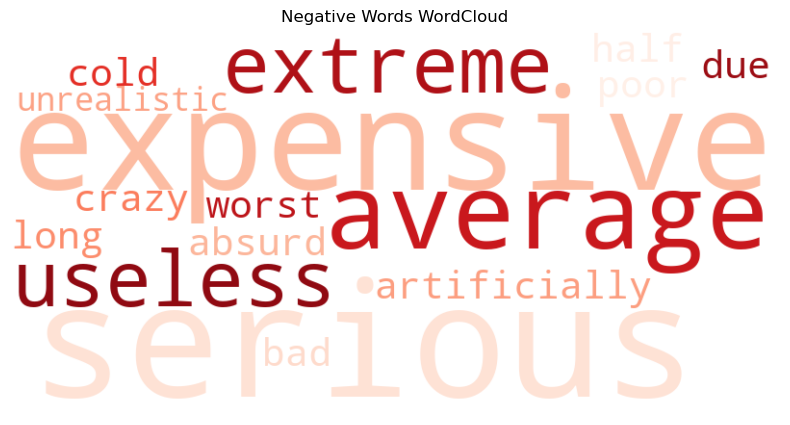

In [2]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# 입력 텍스트 (예시로 주어진 긴 텍스트)
text = """
Depends on what you are looking at. Super hit models always claim a higher resale value. Plus given the inflation rate in emerging economies are high, new car price increases significantly year on year and so does the resale band width.

When you bring such topics, you should also quote real time examples. If I look in to our classified section, the newest add as I write is this. A five year old Creta, 1.6Crdi Automatic with 36k on the odo is quoted 10.9L which I think can be easily negotiated to less than 10L. A new car equivalent today costs about 19.5L so the depreciation is ~50% which IMO is pretty decent for a popular model.

Depends on where you're looking. If it's olx, people inflate prices in anticipation of bargaining. Look for used cars on car24. I see decent deals everywhere tbh. I guess it also depends on your State.

It also depends on make and model. I own a VW, I know I'll face EXTREME depreciation if I were to sell it, otoh the depreciation hit on my Maruti was pretty reasonable. A Fortuner/Innova is going to be almost immune to any depreciation, while you can pick up the Yaris at good prices.

The problem that I face is the absolute lack of experience to judge the depreciated value of cars. Portals like obv and India bluebook seem to be off the mark more often than not.

A few questions:
1. How do you judge the value of a car after 5 to 6 years? Most online depreciation tables run till the 6th year.
2. Do I need to consider the inflation adjusted value of the cars original OTR price when calculating depreciation. I guess that makes sense but then these online portals would be so off the mark that they would become useless.

• People who are not serious about selling their car within a time-frame simply post ads to search for the highest bidder. This creates an illusion of high prices that serious sellers mistake as market prices. Thereby artificially jacking up the price.
• Car prices too have infact been going up 6-7% year-on-year. (This increment is apart from auto-makers who launch cars on introductory prices).
• There is a cartel of used-car-dealers leveraging on the inconvenience to sell ones car privately, while exchange/finance incentivises people to sell to dealers.
• IMO There is genuinely a lack of education/maturity with many sellers/buyers and they are refuse to keep their mind open to other peoples rationale. Many are simply cold about it & don't even justify anything. Sometimes understandable, since individual sellers are hounded by dealers (& even individuals) constantly demeaning their car.
Short answer:: demand and supply

Long answer: to be honest, in my opinion, it is not as high it should be. Considering we are a supposed to be a low Labour cost market.

Remember most people in West sell their cars because:
1) it would be expensive to maintain an old Banger than pay EMI of new car.
2) your average new car prices are less than half of annual salary of average Joe.

So IMHO in India used car prices are lower than they should be.

because:
1) labour is cheap but skilled labour is not and dishonesty is rampant so it's not as cheap to maintain a used cars as it should be.
2) due to bad infrastructure and poor maintenance car life is much shorter. In Western markets a 100k mile(160k km) car is old but okyish buy. Whereas, in India few cars survive respectfully beyond that milage (Unless they carry a Toyota badge).

So I disagree with the statement that used cars are expensive in India. If you want I can give you my 6 years old Santa Fe for 33% of buying price

Yes, used car prices are crazy in India. Some guys ask 95 per cent of O.R. price after 4 years and 50k Kms. What universe do they live in? Heck, I wouldn't consider a penny above 60 per cent to be worth for such cars. Again, assuming they are in pristine condition.

IMO, the worst places to buy used are Bangalore followed by Hyderabad. The best places to buy used are Delhi, Mumbai and Kolkata, in that order. And, one should stay miles away from successful models, such as Innova, Creta etc. The asking prices for such cars sound absurd. Better to buy its less successful but equally reliable rivals.

Asking prices are high but they dont sell at those prices. Cheap buyers tend to quote around 50% of what a seller has listed a product for, even if the listed price is as per market rate. This makes sellers list at high prices so that market price or something close to it can be secured.

I have sold 3 vehicles in last 5 years.
1. An October 2015 Honda CBR 150R (orange colour), done 600Km for 80k or something in July 2016. An individual seller harassed me by calling me as 3 separate customers from 3 different numbers, trying to reduce price to 50-60k (On road price was around 1.3 lacs in October 2015 when I bought it). I eventually sold it to him for 80k. Listed price was 95,000/- for a 10 months old motorcycle. I should have quoted above market price rather than listing an honest price.

2. A Sept 2016 made Bajaj RS200 listed for 75k was eventually sold for 50k in 2019, this one was bought pre-owned in Sept 2017 for 85k in Jodhpur. First Owner still hand loan of around 80k on this vehicle and I offered him 85k from my learning after selling CBR for such price. I kept that motorcycle for sometime and sold it in October 2019 for 50k to a very “sticky and buggy dealer”. Only one individual seller approached me for this bike in the 9-10 months period that I had it for sale. The dealer was able to sell it within 7 days after buying from me so this shows people are willing to pay high amount to dealers rather than dealing with sellers directly.

3. A 2000 Maruti 800 EX sold in 2020 for 29k. It had done 40k Kms and was in excellent mechanical condition. An individual seller bought it on first visit itself. Did not have good experience dealing with Cars24 representative while selling this car.

Selling a possession (car, motorcycle or even an electronic item such as digital camera for that matter) is a heartbreak when you have to deal with super cheap people online who are just passing time quoting unrealistic prices.


I have had a person tell me to sell my RS200 to him for 40-45k as that was his max. paying capacity.

By that logic, I also want to own a Mercedes CLA or a Land Rover Discovery but shall I visit a seller with 5-10 lacs and demand him to sell one to me coz thats my paying capacity?
"""

# 불용어 리스트 가져오기
stop_words = set(stopwords.words('english'))

# 제거할 특정 단어 리스트 (여기서는 'less'를 제외합니다)
exclude_words = {'less'}

# 텍스트 정제 및 토큰화
tokens = word_tokenize(text.lower())
filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words and word not in exclude_words]

# 감정 분석을 통해 부정적인 단어 추출
blob = TextBlob(' '.join(filtered_tokens))
negative_words = [word for word in filtered_tokens if TextBlob(word).sentiment.polarity < 0]

# 추출된 부정적인 단어를 문자열로 변환
negative_text = ' '.join(negative_words)

# 워드클라우드 생성 (붉은 계열 색상 맵 사용)
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Words WordCloud')
plt.show()
